# MT Penetration Depth Profiles over 2DLine and 3DGrid

In [214]:
import sys 
import os
import glob
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[20,10]

import mtpy.core.mt as mt
import mtpy.modeling.occam2d_rewrite as occam2d_new


In [215]:
# Windows File system
#edi_dir=r"E:/Githubz/mtpy2/tests/data/edifiles/"
edi_dir=r"E:/Githubz/mtpy2/examples/data/edi2"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75098\EDI_files"  # not same periods
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\bb_edi\YN3_edi_bb"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\lp_edi"  # not same periods

# Linux OS files
#edi_dir="/Softlab/Githubz/mtpy2/tests/data/edifiles/"
#edi_dir="/Softlab/Githubz/mtpy2/examples/data/edi2"  #edi_files/"

edifiles = glob.glob(os.path.join(edi_dir, '*.edi'))

print (edifiles)

['E:/Githubz/mtpy2/examples/data/edi2\\11_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\135_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\136_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\143_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\1R_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\24_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\26_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\27_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\28_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\2_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\3_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\4_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\80_LF_z.edi', 'E:/Githubz/mtpy2/examples/data/edi2\\81_LF_z.edi']


In [216]:
2539*3.98

10105.22

2017-02-13 15:45:46,789 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\11_LF_z.edi
2017-02-13 15:45:46,803 - mtpy.core.edi - INFO - Read in edi file for station 11
2017-02-13 15:45:46,813 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\135_LF_z.edi
2017-02-13 15:45:46,826 - mtpy.core.edi - INFO - Read in edi file for station 135
2017-02-13 15:45:46,835 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\136_LF_z.edi
2017-02-13 15:45:46,846 - mtpy.core.edi - INFO - Read in edi file for station 136
2017-02-13 15:45:46,855 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\143_LF_z.edi
2017-02-13 15:45:46,868 - mtpy.core.edi - INFO - Read in edi file for station 143
2017-02-13 15:45:46,877 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\1R_LF_z.edi
2017-02-13 15:45:46,888 - mtpy.core.edi - INFO - Read in edi file for station 1R

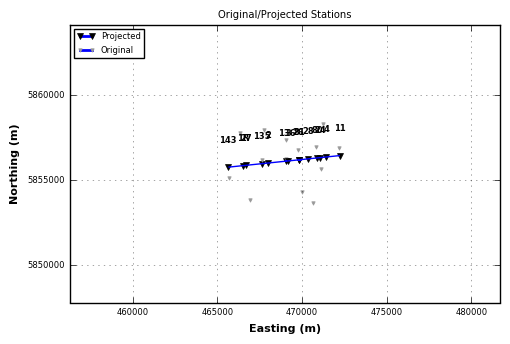

In [217]:
# stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
# pr = occam2d_new.Profile(edi_path=edi_dir, station_list=stations)

pr = occam2d_new.Profile(edi_path=edi_dir)
pr.generate_profile()
# set station labels to only be from 1st to 4th index 
# of station name
      
pr.plot_profile(station_id=[0,4])

In [218]:
 pr.station_locations

array([    0.        ,   917.2119252 ,  1075.03885722,  2033.90055144,
        2372.8597407 ,  3474.92377052,  3562.45862928,  4191.31758623,
        4237.85214906,  4750.06746138,  5303.79839349,  5480.32161626,
        5844.77106388,  6656.99462322])

In [219]:
pr.edi_list

In [220]:
# See http://localhost:8888/notebooks/examples/notebooks/Apparent_Resistivity_Penetration_Depth.ipynb
# def plotbar_pen_depth(per_index, edifiles):

per_index=2
    
scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))

#per_index=0,1,2,....    
periods=[] 

app_resis=[]

stations=[]
    
for mt_obj in pr.edi_list:

    # the attribute Z
    zeta=mt_obj.Z
    

    if per_index>=len(zeta.freq):
        raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")

    per=1.0/zeta.freq[per_index]
    periods.append(per)

    penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
    app_resis.append(penetration_depth)

    stations.append(mt_obj.station)
    

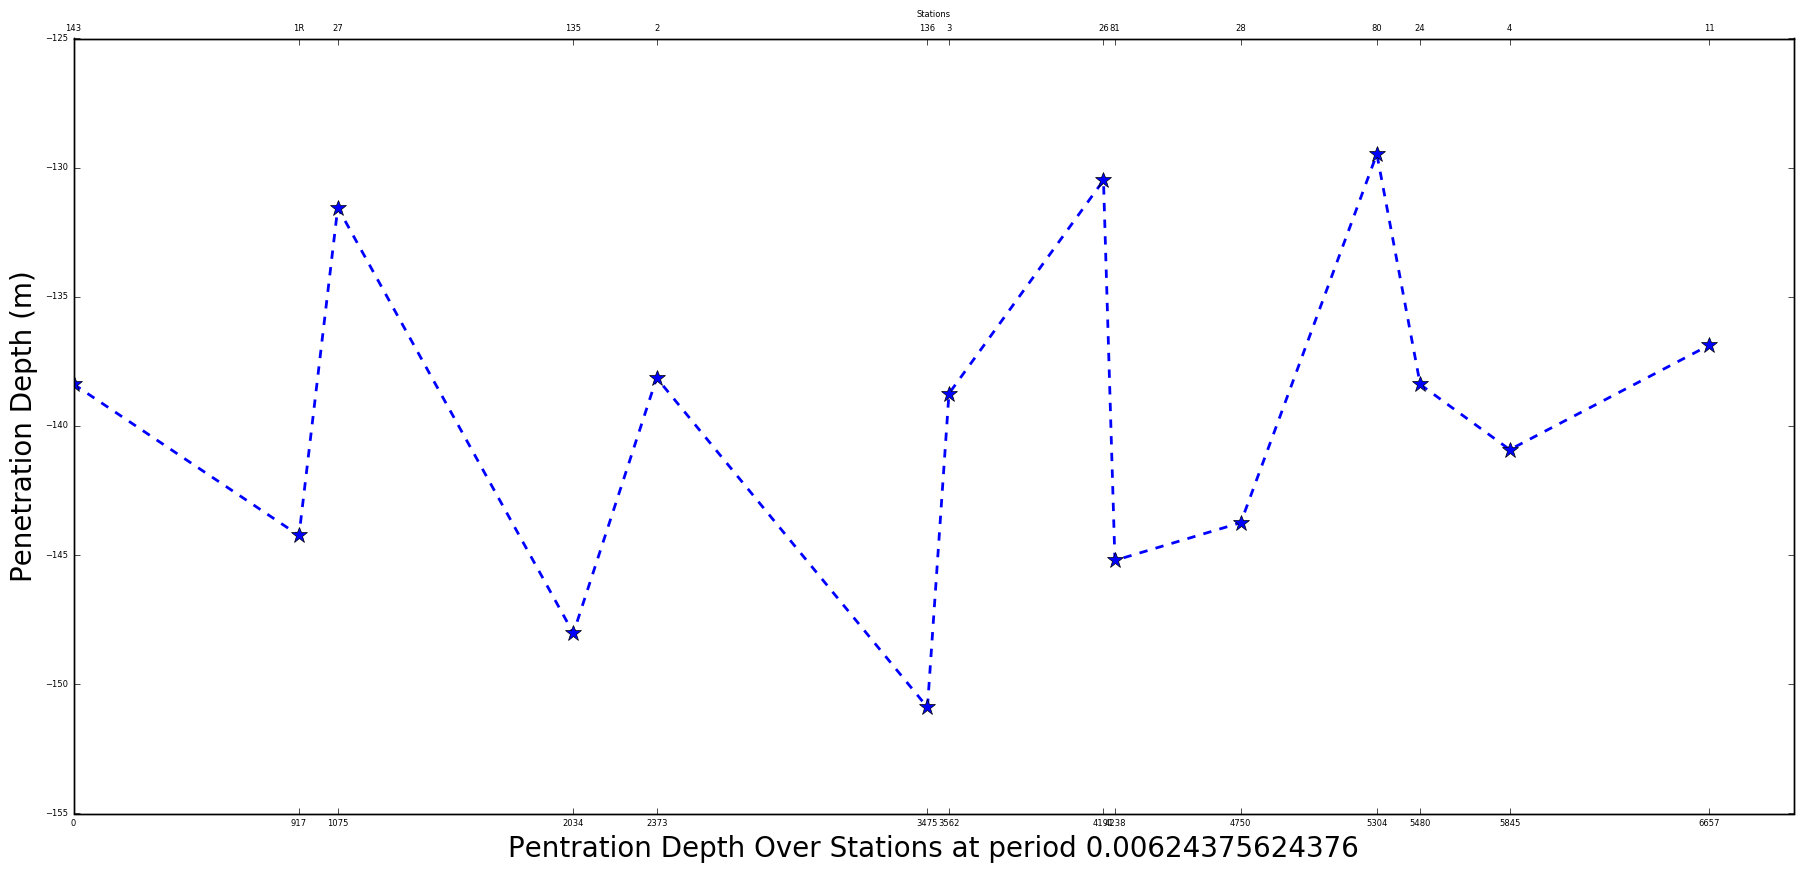

In [221]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#plt.bar(index, app_resis, color='#000000')
ax1.plot(pr.station_locations, app_resis, '--*', markersize="12", linewidth="2", label="Penetration Depth")
# plt.xaxis.tick_top()
# plt.set_xlabel('X LABEL')    
# plt.xaxis.set_label_position('top') 

ax1.set_xlabel('Pentration Depth Over Stations at period %s'%periods[0],fontsize=20)
ax1.set_xticks(pr.station_locations)
ax1.set_ylabel('Penetration Depth (m)', fontsize=20)


ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pr.station_locations)
ax2.set_xticklabels(stations)
ax2.set_xlabel(r"Stations")

#plt.show()

In [222]:
#http://stackoverflow.com/questions/10514315/how-to-add-a-second-x-axis-in-matplotlib


# import numpy as np
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

# X = np.linspace(0,1,1000)
# Y = np.cos(X*20)

# ax1.plot(X,Y)
# ax1.set_xlabel(r"Original x-axis: $X$")
# ax1.grid(True)
# new_tick_locations = np.array([.2, .5, .9])

# def tick_function(X):
#     V = 1/(1+X)
#     return ["%.3f" % z for z in V]

# ax2.set_xlim(ax1.get_xlim())
# ax2.set_xticks(new_tick_locations)
# ax2.set_xticklabels(tick_function(new_tick_locations))
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

# plt.show()


In [223]:
# plt.plot?

#plt.legend?

#plt.xticks?
#OR
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



In [224]:
# pr.geoelectric_strike = 45 # preset a rotation angle

# pr.generate_profile()

# pr.plot_profile()

In [225]:
stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
stations

['15124A', '15125A', '15126A', '15127A', '15128A', '15129A', '15130A']

# 3D-plot penetration depth profile over stations

    - For a given fre/per index of a set of edifiles, the (lat, lon) are extracted and bounding box calculated.
    - A pmesh is made with None value initially for all pixels, reset the pixels value according to the MT station pen-depth. 
    - Finally show the pcolor plot

In [226]:
def get_penetration_depth(per_index, edifiles):
    """ input period index and a list of edi files,
    return tuple of lists (stations, periods, penetrationdepth, lat-lons-pairs)
    """
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    
    #per_index=0,1,2,....    
    periods=[] 
    
    pendep=[]
    
    stations=[]
    
    latlons=[]
    
    for afile in edifiles:
        mt_obj = mt.MT(afile)
        
        latlons.append((mt_obj.lat, mt_obj.lon))
        
    
        # the attribute Z
        zeta=mt_obj.Z
        
        if per_index>=len(zeta.freq):
            raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")
        
        per=1.0/zeta.freq[per_index]
        periods.append(per)
       
        penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
        pendep.append(penetration_depth)
        
        stations.append(mt_obj.station)
        

    return (stations,periods,pendep, latlons )

In [227]:
(stations,periods,pendep, latlons )=get_penetration_depth(10, edifiles)

2017-02-13 15:45:48,602 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\11_LF_z.edi
2017-02-13 15:45:48,615 - mtpy.core.edi - INFO - Read in edi file for station 11
2017-02-13 15:45:48,625 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\135_LF_z.edi
2017-02-13 15:45:48,635 - mtpy.core.edi - INFO - Read in edi file for station 135
2017-02-13 15:45:48,645 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\136_LF_z.edi
2017-02-13 15:45:48,658 - mtpy.core.edi - INFO - Read in edi file for station 136
2017-02-13 15:45:48,668 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\143_LF_z.edi
2017-02-13 15:45:48,681 - mtpy.core.edi - INFO - Read in edi file for station 143
2017-02-13 15:45:48,691 - mtpy.core.edi - INFO - Reading the edi file E:/Githubz/mtpy2/examples/data/edi2\1R_LF_z.edi
2017-02-13 15:45:48,704 - mtpy.core.edi - INFO - Read in edi file for station 1R

In [228]:
stations

['11',
 '135',
 '136',
 '143',
 '1R',
 '24',
 '26',
 '27',
 '28',
 '2',
 '3',
 '4',
 '80',
 '81']

In [229]:
periods  # All must be of the same value across stations

[0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858,
 0.039384033712732858]

In [230]:
pendep

[-384.51451354287286,
 -388.1672695160853,
 -393.37876600834329,
 -365.62551228169934,
 -379.80368661297967,
 -389.96548681870962,
 -364.33102884725844,
 -358.50494016505479,
 -385.21510518683368,
 -364.47249872924596,
 -382.13749945457101,
 -379.7274705646339,
 -362.48786160558177,
 -388.67754083289037]

In [231]:
latlons

[(-37.43418333333333, 140.68573333333333),
 (-37.44058333333333, 140.63401666666667),
 (-37.440016666666665, 140.65031666666667),
 (-37.45023333333334, 140.61211666666665),
 (-37.42635, 140.61955),
 (-37.44531666666666, 140.67376666666667),
 (-37.457483333333336, 140.66065),
 (-37.46183333333334, 140.62578333333335),
 (-37.46371666666667, 140.66778333333332),
 (-37.42448333333333, 140.63585),
 (-37.430233333333334, 140.65008333333333),
 (-37.421549999999996, 140.67491666666666),
 (-37.43383333333333, 140.67031666666665),
 (-37.43523333333333, 140.65838333333335)]

In [232]:
def get_bounding_box(latlons):
    """ get min max lat lon from the list of lat-lon-pairs points"""
    lats=[tup[0] for tup in latlons]
    lons=[tup[1] for tup in latlons]

    minlat=min(lats)
    maxlat=max(lats)

    print(minlat, maxlat)

    minlon= min(lons)
    maxlon= max(lons)

    print(minlon, maxlon)
    
    return ((minlon,maxlon), (minlat, maxlat))

In [233]:
bbox=get_bounding_box(latlons)

(-37.46371666666667, -37.421549999999996)
(140.61211666666665, 140.68573333333333)


In [234]:
bbox

((140.61211666666665, 140.68573333333333),
 (-37.46371666666667, -37.421549999999996))

# Make a gridded Image with suitable pixel size/resolution

In [246]:
xgrids= bbox[0][1] - bbox[0][0]
ygrids= bbox[1][1] - bbox[1][0]

print(xgrids, ygrids)

#Pixel size in Degree:  0.001=100meters, 0.01=1KM 1deg=100KM

pixelsize=0.002  #Degree 0.001=100meters, 0.01=1KM 1deg=100KM

nx= int(np.ceil(xgrids/pixelsize))
ny= int(np.ceil(ygrids/pixelsize))


print(nx, ny)

(0.07361666666668043, 0.04216666666667379)
(37, 22)


In [259]:
# make an image bigger than the (nx, ny)   
pad=4

nx2= nx + pad
ny2= ny+ pad

# Z = 0.0* np.random.random((nx2,ny2))   # Test data
# Z=  np.ones((nx2,ny2))
zdep=   np.zeros((ny2,nx2))
# Z[10, 10]=12
# Z[11, 20]=20
# Z[13, 15]=30

zdep[:,:]=np.nan

zdep.shape

(26L, 41L)

In [260]:
round(3.49)

3.0

In [261]:
offset=0
minlat= bbox[1][0]
minlon= bbox[0][0]
# LL_lat= minlat -offset*pixelsize
# LL_lon= minlon -offset*pixelsize

# UR_lat=maxlat + offset*pixelsize
# UR_lon= maxlon + offset*pixelsize

def get_index(lat, lon, offset=1):
    index_x = (lon - minlon)/pixelsize
    index_y= (lat- minlat)/pixelsize
    
    ix=int(round(index_x))
    iy=int(round(index_y))
    
    print (ix, iy)
    
    return(ix+offset, iy+offset)


In [262]:
for iter, pair in enumerate(latlons):
    print pair
    (xi,yi)= get_index(pair[0], pair[1])
    zdep[zdep.shape[0]-yi,xi] = np.abs(pendep[iter])

(-37.43418333333333, 140.68573333333333)
(37, 15)
(-37.44058333333333, 140.63401666666667)
(11, 12)
(-37.440016666666665, 140.65031666666667)
(19, 12)
(-37.45023333333334, 140.61211666666665)
(0, 7)
(-37.42635, 140.61955)
(4, 19)
(-37.44531666666666, 140.67376666666667)
(31, 9)
(-37.457483333333336, 140.66065)
(24, 3)
(-37.46183333333334, 140.62578333333335)
(7, 1)
(-37.46371666666667, 140.66778333333332)
(28, 0)
(-37.42448333333333, 140.63585)
(12, 20)
(-37.430233333333334, 140.65008333333333)
(19, 17)
(-37.421549999999996, 140.67491666666666)
(31, 21)
(-37.43383333333333, 140.67031666666665)
(29, 15)
(-37.43523333333333, 140.65838333333335)
(23, 14)


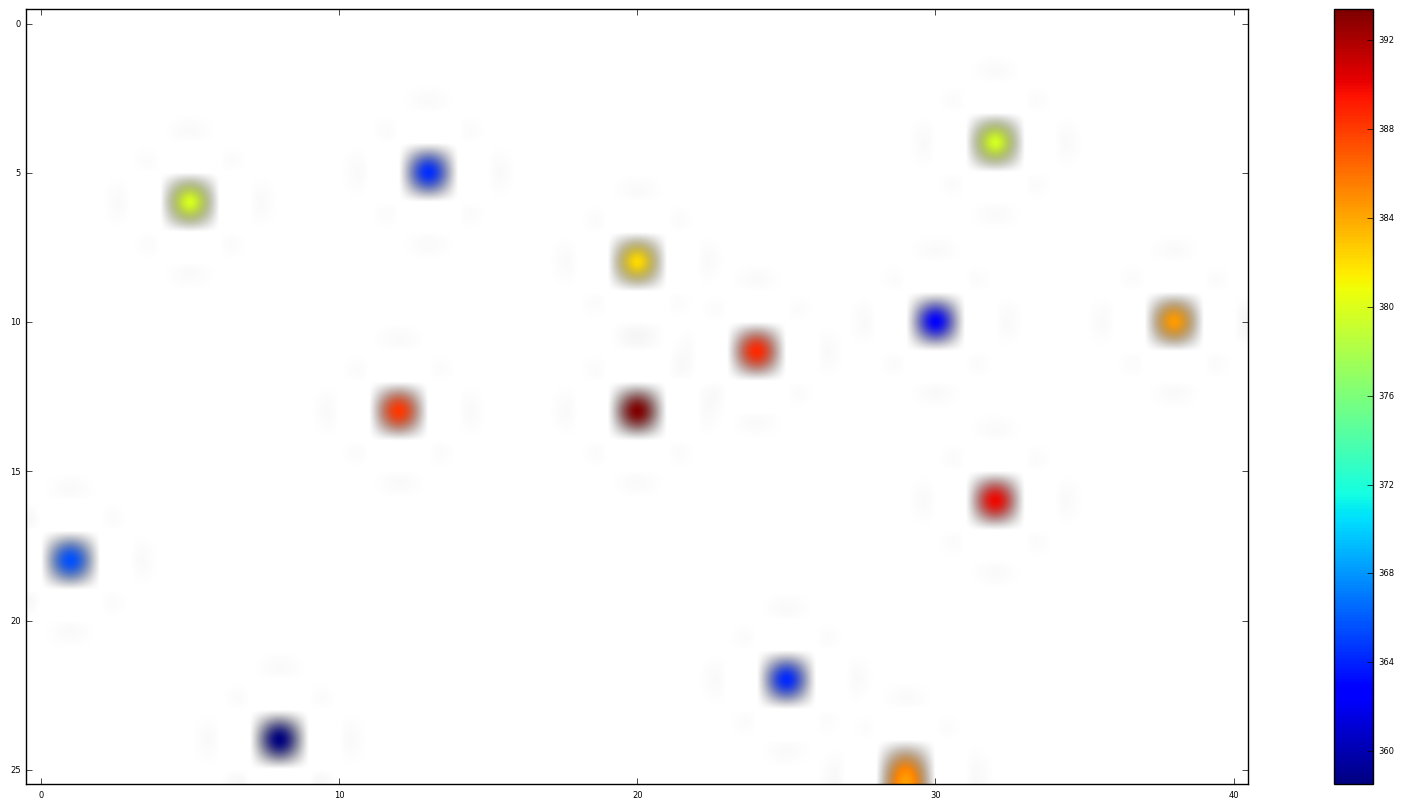

In [285]:
#plt.imshow(zdep) #,  interpolation='none')
plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [284]:
# 1)Tips lat-lon orientation: lat <=> north-south; y-coordinate; the first index of the Image2D(first, second)  

# 2) interpolation? image pixels
plt.imshow?

In [267]:

import scipy.interpolate as scipyinterp

In [275]:
xd= zdep.shape[0]
yd= zdep.shape[1]

x=np.zeros(xd)
y=np.zeros(yd)

for i in xrange(xd):
    x[i]=i
for j in xrange(yd):
    y[j]=j

print type(x)
print y

obj=scipyinterp.RectBivariateSpline(x, y, zdep)

<type 'numpy.ndarray'>
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]


In [282]:
obj.get_coeffs()

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [296]:
zdep.shape

(26L, 41L)

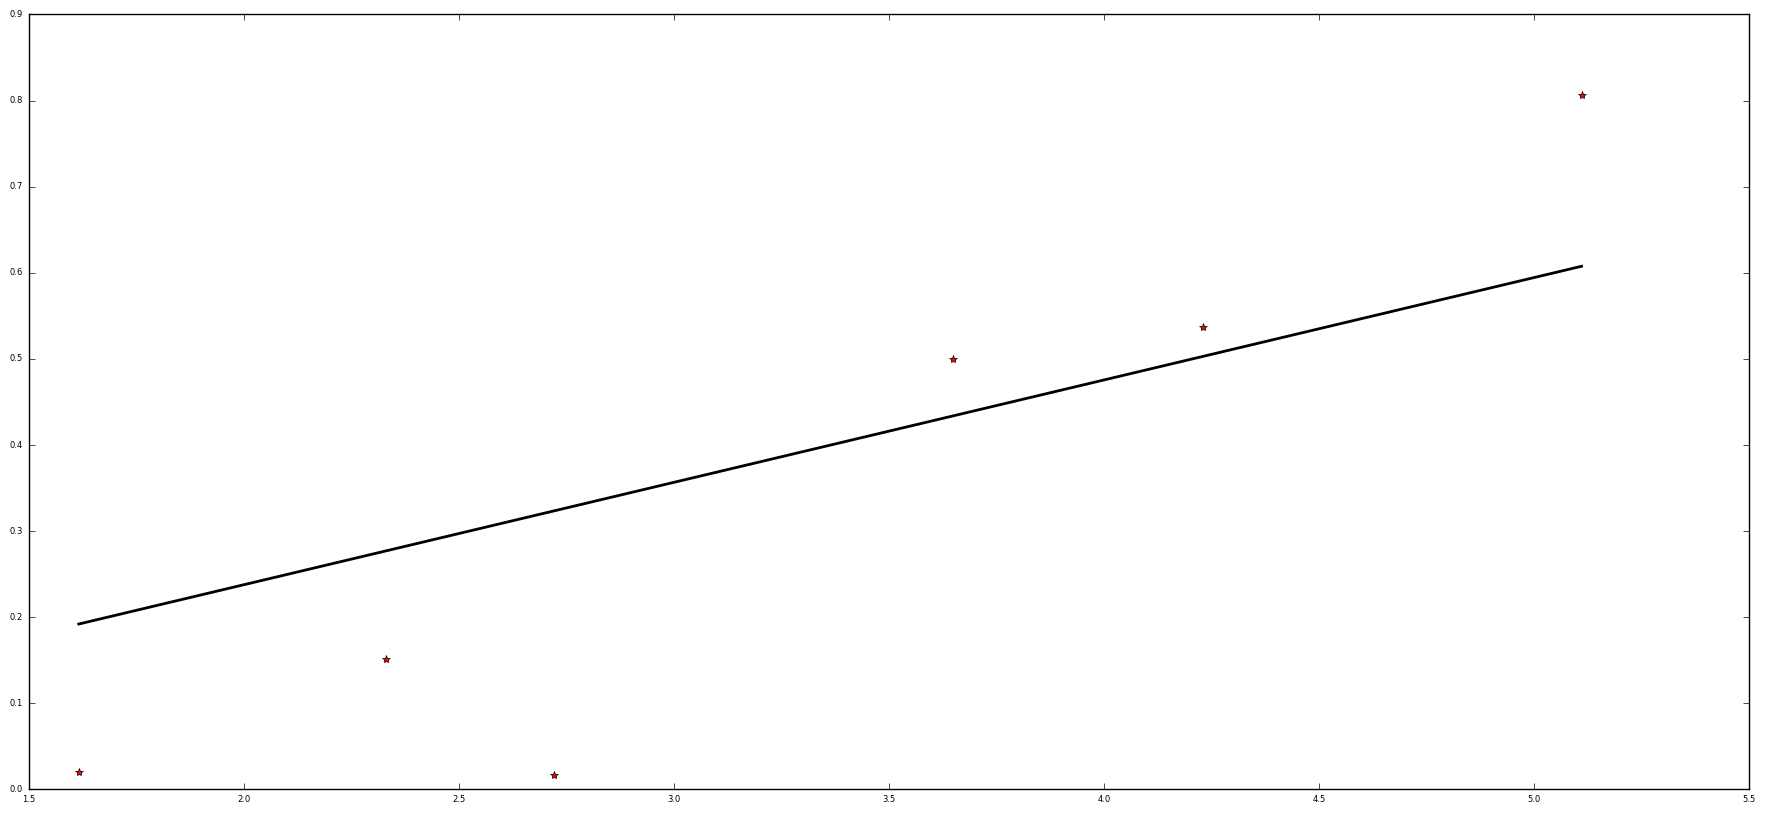

In [288]:
from pykrige.uk import UniversalKriging
import numpy as np

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to 
# UniversalKriging.__doc__ for more information.
UK = UniversalKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridx, gridy)

In [289]:
gridx

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [290]:
data[:,0]

array([ 0.3,  1.9,  1.1,  3.3,  4.7])

In [292]:
import pykrige.kriging_tools as kt
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

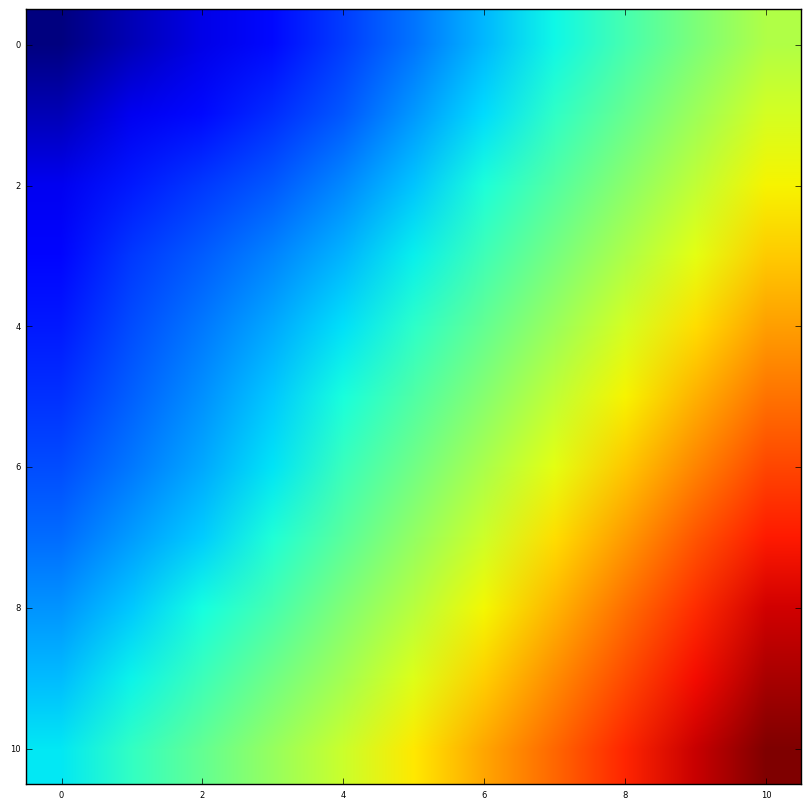

In [295]:
plt.imshow(z)

In [308]:
gridyy = np.arange(0.0, zdep.shape[0], 1.0)
gridxx = np.arange(0.0, zdep.shape[1], 1.0)

In [309]:
gridxx

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.])

In [331]:
datax=np.zeros(len(latlons))
datay=np.zeros(len(latlons))

dataz=np.zeros(len(latlons))


for iter, pair in enumerate(latlons):
    print pair
    (i,j)= get_index(pair[0], pair[1])
    datax[iter]=i
    datay[iter]=zdep.shape[0]-j
    dataz[iter] = np.abs(pendep[iter])

(-37.43418333333333, 140.68573333333333)
(37, 15)
(-37.44058333333333, 140.63401666666667)
(11, 12)
(-37.440016666666665, 140.65031666666667)
(19, 12)
(-37.45023333333334, 140.61211666666665)
(0, 7)
(-37.42635, 140.61955)
(4, 19)
(-37.44531666666666, 140.67376666666667)
(31, 9)
(-37.457483333333336, 140.66065)
(24, 3)
(-37.46183333333334, 140.62578333333335)
(7, 1)
(-37.46371666666667, 140.66778333333332)
(28, 0)
(-37.42448333333333, 140.63585)
(12, 20)
(-37.430233333333334, 140.65008333333333)
(19, 17)
(-37.421549999999996, 140.67491666666666)
(31, 21)
(-37.43383333333333, 140.67031666666665)
(29, 15)
(-37.43523333333333, 140.65838333333335)
(23, 14)


In [332]:
dataz

array([ 384.51451354,  388.16726952,  393.37876601,  365.62551228,
        379.80368661,  389.96548682,  364.33102885,  358.50494017,
        385.21510519,  364.47249873,  382.13749945,  379.72747056,
        362.48786161,  388.67754083])

In [334]:
datay

array([ 10.,  13.,  13.,  18.,   6.,  16.,  22.,  24.,  25.,   5.,   8.,
         4.,  10.,  11.])

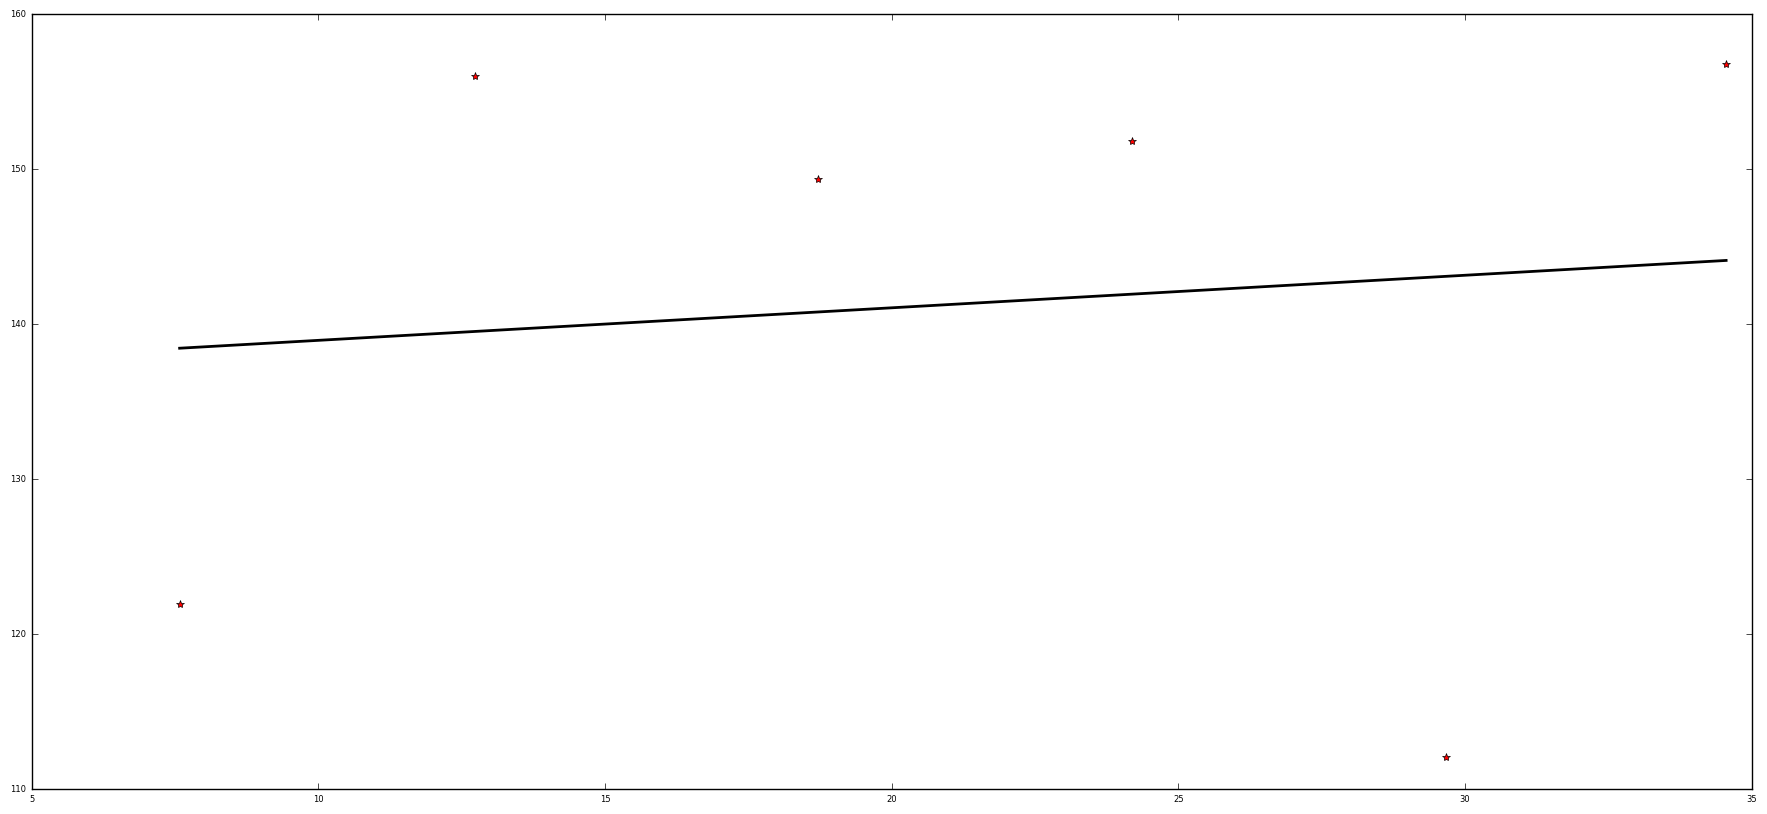

In [335]:
UK = UniversalKriging(datax, datay, dataz, variogram_model='linear',
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridxx, gridyy)

In [336]:
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridxx, gridyy, z, filename="Pen_depth_interp_krigged.asc")

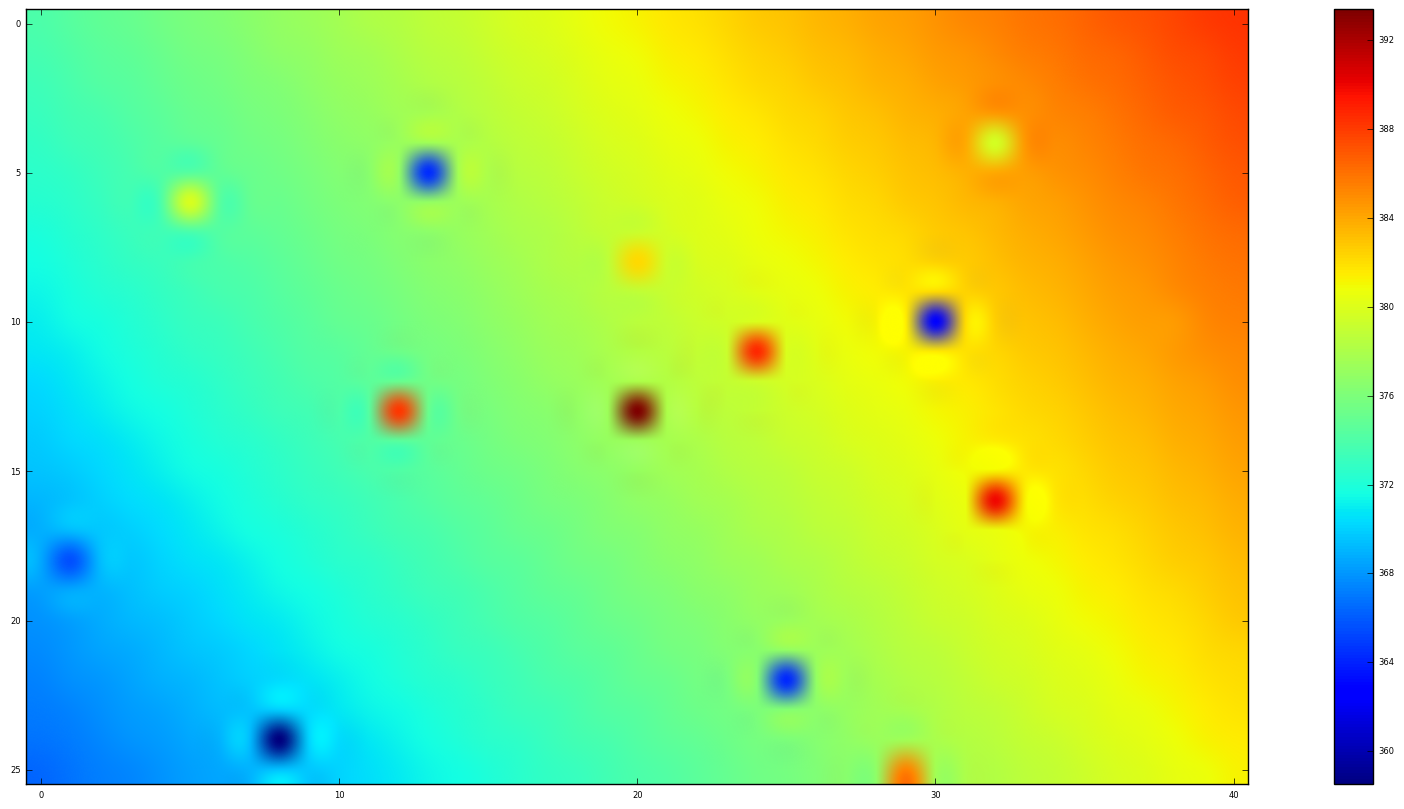

In [337]:
plt.imshow(z, interpolation='spline36')
plt.colorbar()

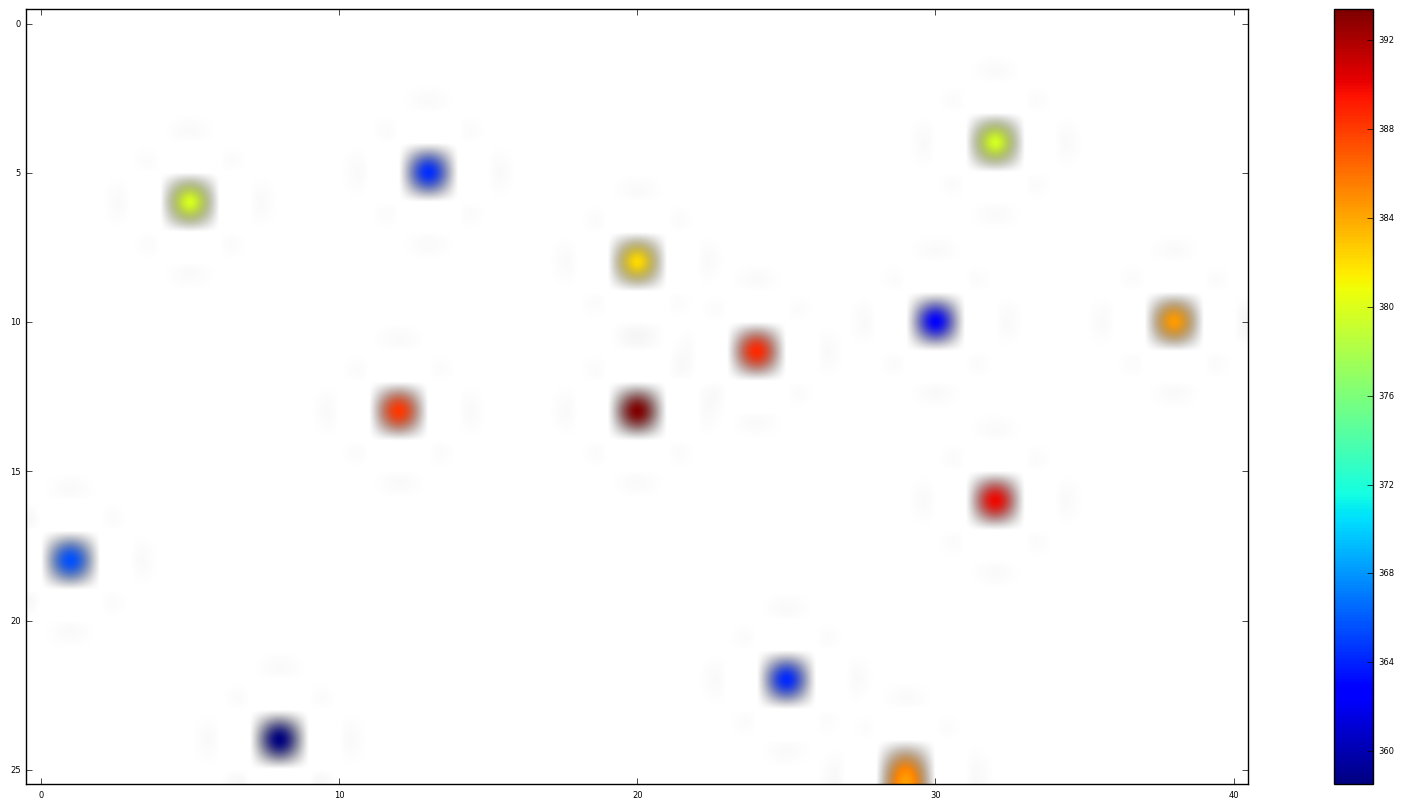

In [338]:
#plt.imshow(zdep) #,  interpolation='none')
plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [339]:
z

masked_array(data =
 [[374.01283136158264 374.3795294076213 374.7455126167238 ...,
  387.580330613791 387.9436149162424 388.30727097560344]
 [373.72585871388554 374.09354423542266 374.4605377253849 ...,
  387.2878552215831 387.6517053820498 388.01583750987226]
 [373.43856496310786 373.80740911896737 374.17565538288835 ...,
  386.99611889872585 387.3605337106471 387.72512198681386]
 ..., 
 [367.12955862144105 367.4917115741967 367.854229202694 ...,
  381.0554199810611 381.40972984264744 381.7643640048513]
 [366.82981994348916 367.1911873246297 367.5526573383021 ...,
  380.76519923606406 381.11988263211225 381.47482783873403]
 [366.53129465699163 366.89217111018877 367.25304400489983 ...,
  380.47401686254165 380.82911172025507 381.1844136382787]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False Fa

In [340]:
# See https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html